## Priprava podatkov, osnovne statistike in vizualizacija

Podatkovno rudarjenje, naloga, `19.3.2022`  
**`Luka Šveigl`**

Neizogiben del vsakega projekta na področju podatkovnega rudarjenja je iskanje,
urejanje in priprava podatkov. V tej nalogi boste spoznali primer podatkovne
zbirke in uporabili postopke za pretvorbo podatkov v ustrezno obliko ter pregled in
prikaz osnovnih statistik.

### Podatki

V nalogi boste pregledali in pripravili podatke gledanosti Hollywoodskih filmov
zbirke [MovieLens](https://grouplens.org/datasets/movielens/) v obdobju **1995-2016**.

Iste podatke boste uporabili v vseh nalogah, zato jih dodobra spoznajte. Gre za podatkovno zbirko za
vrednotenje priporočilnih sistemov, ki vsebuje gledalce ter njihove ocene za posamezni film na lestvici 1 do 5. 
Poleg osnovne matrike uporabnikov in ocen vsebuje še dodatne podatke o filmih (npr. žanr, datum, oznake,
igralci).

Podatki so v mapi `./podatki/ml-latest-small`. Podatkovna zbirka vsebuje naslednje datoteke:

* ratings.csv: podatki o uporabnikih in ocenah,
* movies.csv: podatki o žanrih filmov,
* cast.csv: podatki o igralcih,
* tags.csv: podatki o oznakah (ang. \emph{tags}),
* links.csv: povezave na sorodne podatkovne zbirke.


Pred pričetkom reševanja naloge si dobro oglejte podatke in datoteko **README.txt**. Podrobnosti o zbirki lahko preberete na [spletni strani](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

Pripravite metode za nalaganje podatkov v ustrezne podatkovne strukture. Te vam bodo prišle
prav tudi pri nadaljnjih nalogah.
Bodite pozorni na velikost podatkov.

Zapišite kodo za branje datotek in pripravo ustreznih matrik (in drugih struktur) podatkov, ki jih boste uporabi pri odgovarjanju na spodnja vprašanja.

Kodo lahko razdelite v več celic.

In [1]:
from csv import DictReader
from datetime import datetime

def read_dataset(path):
    reader = DictReader(open(path, 'rt', encoding='utf-8'))
    return reader

def timestamp_to_datetime(timestamp):
    return datetime.fromtimestamp(timestamp)

### Vprašanja

Glavni namen podatkovnega rudarjenja je *odkrivanje znanj iz podatkov*,
torej odgovarjanje na vprašanja z uporabo računskih postopkov.

Z uporabo principov, ki ste jih spoznali na vajah in predavanjih, odgovorite na
spodnja vprašanja. Pri vsakem vprašanju dobro premislite, na kakšen način boste
najbolje podali, prikazali oz. utemeljili odgovor. Bistven del so odgovori na
vprašanja in ne implementacija vaše rešitve.

#### 1. vprašanje (15%):
Kateri filmi so v povprečju najbolje ocenjeni?  Pripravite seznam
filmov ter njihovih povprečnih ocen in izpišite 10 filmov z vrha seznama.
Opazite pri takem ocenjevanju kakšno težavo? Kako bi jo lahko rešili? Kakšni so
rezultati tedaj?

Kodo lahko razdelite v več celic.

In [2]:
movies = read_dataset('podatki/ml-latest-small/movies.csv')
ratings = read_dataset('podatki/ml-latest-small/ratings.csv')

sum_of_ratings = dict() 

# Fill dict with movie title, rating sum and rating counter
for movie in movies:
    sum_of_ratings[movie['movieId']] = [movie['title'], 0, 0]
    
# Increase rating sum and increment rating counter
for rating in ratings:
    sum_of_ratings[rating['movieId']][1] += float(rating['rating'])
    sum_of_ratings[rating['movieId']][2] += 1
    
average_ratings = dict()

# For movies which have ratings, calculate average rating
for k, v in sum_of_ratings.items():
    if v[2] != 0:
        average_ratings[k] = v[1] / v[2]
    
# Sort dict and select top 10 results     
top = sorted(average_ratings, key=average_ratings.get, reverse=True)[:10]

names = []

for t in top:
    names.append(sum_of_ratings[t][0])

print(names)


['Lamerica (1994)', 'Mute Witness (1994)', 'Picture Bride (Bijo photo) (1994)', 'Red Firecracker, Green Firecracker (Pao Da Shuang Deng) (1994)', 'Paris, France (1993)', 'Faces (1968)', 'Maya Lin: A Strong Clear Vision (1994)', 'Heavy (1995)', 'Death in the Garden (Mort en ce jardin, La) (1956)', 'Day the Sun Turned Cold, The (Tianguo niezi) (1994)']


Odgovor: **10 najbolje ocenjenih filmov je: 'Lamerica (1994)', 'Mute Witness (1994)', 'Picture Bride (Bijo photo) (1994)', 'Red Firecracker, Green Firecracker (Pao Da Shuang Deng) (1994)', 'Paris, France (1993)', 'Faces (1968)', 'Maya Lin: A Strong Clear Vision (1994)', 'Heavy (1995)', 'Death in the Garden (Mort en ce jardin, La) (1956)', 'Day the Sun Turned Cold, The (Tianguo niezi) (1994)'.**

**Problem tega pristopa je, da zelo dobre ocene dobijo filmi, ki imajo lahko zelo malo ocen, kar jim lahko dvigne oceno. To težavo bi lahko odpravili tako, da bi v ocenjevanju upoštevali tudi število glasov ali pa da nebi upoštevali filmov z manj kot določeno št. ocenami. Problem je tudi, da sem za izračune uporabljal slovarje, kar lahko spremeni vrstni red rezultatov.**

#### 2. vprašanje (15%):
Posamezni film pripada enemu ali več žanrom. 
Koliko je vseh žanrov? Prikaži porazdelitev žanrov z uporabo ustrezne
vizualizacije.

Kodo lahko razdelite v več celic.

# of genres: 19


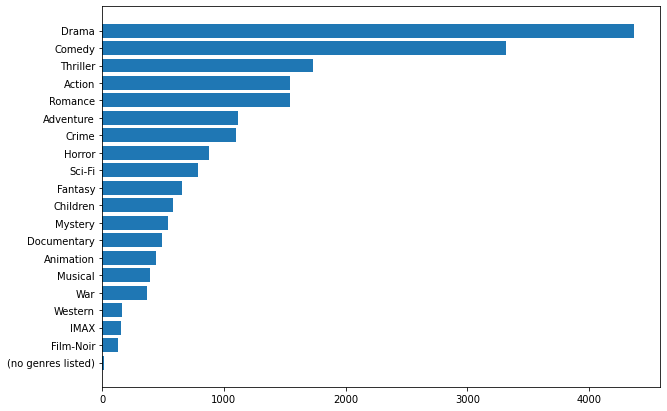

In [3]:
import matplotlib
import matplotlib.pyplot as plt

movies = read_dataset('podatki/ml-latest-small/movies.csv')
genres = dict()

# Fill dict with genres and count movies with that genre
for movie in movies:
    for genre in movie['genres'].split('|'):
        if genre in genres.keys():
            genres[genre] += 1
        else:
            genres[genre] = 0
            
print("# of genres: " + str(len(genres) - 1))

# Get sorted list of key : value tuples
sorted_genres = sorted(genres.items(), key=lambda x: x[1])

# Draw bar graph of genres
fig1, ax1 = plt.subplots(figsize=(10, 7))
ax1.barh([keys for keys, _ in sorted_genres], [values for _, values in sorted_genres], align='center')

plt.show()

Odgovor: **Žanrov je 19, brez upoštevanja stolpca 'No genres listed'**

#### 3. vprašanje (20%):
Število ocen (ogledov) se za posamezni film razlikuje. Ali
obstaja povezava med gledanostjo in povprečno oceno filma? Opišite postopek, ki
ste ga uporabili pri odgovarjanju na vprašanje.

Kodo lahko razdelite v več celic.

Pearson's correlation coefficient: 
[[1.         0.13082727]
 [0.13082727 1.        ]]


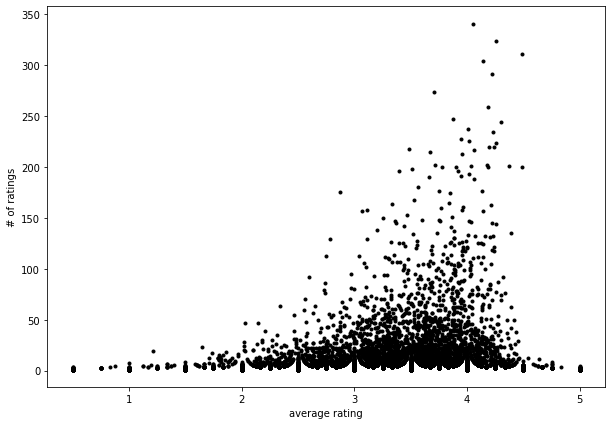

In [19]:
ratings = read_dataset('podatki/ml-latest-small/ratings.csv')

sum_of_ratings = dict()
# Fill dict of ratings with counters and sums of ratings
for rating in ratings:
    if rating['movieId'] in sum_of_ratings:
        sum_of_ratings[rating['movieId']][0] += 1
        sum_of_ratings[rating['movieId']][1] += float(rating['rating'])
    else:
        sum_of_ratings[rating['movieId']] = [1, float(rating['rating'])]

averages = [v[1] / v[0] for _, v in sum_of_ratings.items() if v[0] > 0]
rcounts = [v[0] for _, v in sum_of_ratings.items() if v[0] > 0]

# Calculate pearson's coefficient of correlation
import numpy as np
coeff = np.corrcoef(averages, rcounts)

print("Pearson's correlation coefficient: \n" + str(coeff))
                 
# Plot line graph
fig2, ax2 = plt.subplots(figsize=(10, 7))
ax2.plot(averages, rcounts, "k.")
ax2.set_xlabel('average rating')
ax2.set_ylabel('# of ratings')
plt.show()


Odgovor: **Pri tej nalogi sem ugotovil, da ni korelacije med številom ocen ter povprečno oceno filma.**

**Naloge sem se lotil tako, da sem najprej za vsak film izračunal njegovo povprečno oceno in število ocen, ki jih ima. Nato sem ugotovitve prikazal z sevnim diagramom, rezultate pa potrdil z Pearsonovim koeficientom korelacije.**

#### 4. vprašanje (30%):
Vsaka ocena je bila vnešena na določen datum (stolpec
*timestamp*).  Ali se popularnost posameznih filmov s časom spreminja?
Problem reši tako, da za dani film ocene razporediš po času ter v vsaku časovni
točki izračunaš povprečje za zadnjih 30, 50, ali 100 ocen. Nariši graf, kako se
ocena spreminja in ga prikaži za dva zanimiva primera filmov.

Kodo lahko razdelite v več celic.

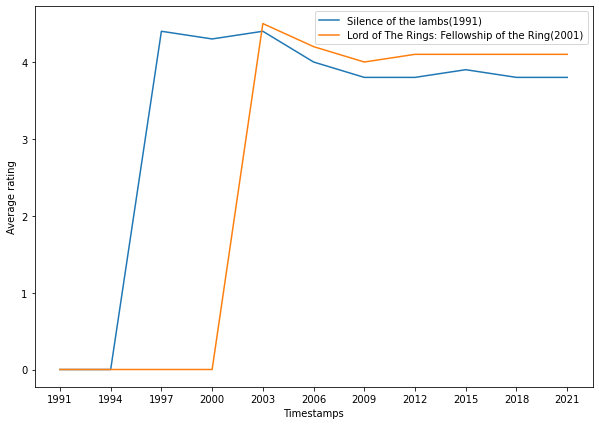

In [ ]:
movies = read_dataset('podatki/ml-latest-small/movies.csv')
ratings = read_dataset('podatki/ml-latest-small/ratings.csv')

# Create empty timestamps dict, first number is rating for Silence of the lambs (1991),
# second number is rating for Lord of the Rings: Fellowship of the Ring (2001)
timestamps = dict()
for i in range(1991, 2023, 3):
    timestamps[str(i)] = {'593' : 0, '4993' : 0}

# Create lists to hold ratings at given timestamps
rating_lotr = []
rating_sotl = []

# Fill list with ratings and timestamps
for rating in ratings:
    if rating['movieId'] == '593':
        rating_sotl.append((float(rating['rating']), timestamp_to_datetime(int(rating['timestamp']))))
    elif rating['movieId'] == '4993':
        rating_lotr.append((float(rating['rating']), timestamp_to_datetime(int(rating['timestamp']))))

# Sort lists by datetime
rating_lotr.sort(key=lambda x: x[1])
rating_sotl.sort(key=lambda x: x[1])

for ts in timestamps:
    # For each timestamp calculate last occurence of that timestamp or lower in list
    lotr_index_last = max([-1] + [idx for idx, val in enumerate([y[1].year for y in rating_lotr]) if val <= int(ts)])
    sotl_index_last = max([-1] + [idx for idx, val in enumerate([y[1].year for y in rating_sotl]) if val <= int(ts)])
        
    # Take last 30 timestamps and add rating, increment counter
    lotr_avg = [0, 0]
    if lotr_index_last != -1:
        for i in range(lotr_index_last, lotr_index_last - 30, -1):
            if i >= 0:
                lotr_avg[0] += 1
                lotr_avg[1] += rating_lotr[i][0]
            
    sotl_avg = [0, 0]
    if sotl_index_last != -1:
        for i in range(sotl_index_last, sotl_index_last - 30, -1):
            if i >= 0:
                sotl_avg[0] += 1
                sotl_avg[1] += rating_sotl[i][0]
            
    # Calculate average scores for that timestamp
    if lotr_avg[0] != 0:
        timestamps[ts]['4993'] = round(lotr_avg[1]/lotr_avg[0], 1)
        
    if sotl_avg[0] != 0:
        timestamps[ts]['593'] = round(sotl_avg[1]/sotl_avg[0], 1)

# Draw line graphs
fig3, ax3 = plt.subplots(figsize=(10, 7))

ax3.plot(timestamps.keys(), [avgr for avgr in [item['593'] for item in timestamps.values()]])
ax3.plot(timestamps.keys(), [avgr for avgr in [item['4993'] for item in timestamps.values()]])

ax3.set_xlabel('Timestamps')
ax3.set_ylabel('Average rating')
ax3.legend(['Silence of the lambs(1991)', 'Lord of The Rings: Fellowship of the Ring(2001)'])

plt.show()
    


Odgovor: **Pri tej nalogi sem si izbral filma Silence of the lambs in Lord of the Rings: Fellowship of the Ring, saj sta ena najpopularnejših filmov, in imata zato veliko ocen, prav tako pa je med njunima premierama 10 let razlike, zato je bila primerjava toliko bolj zanimiva.** 

**Naloge sem se lotil tako, da sem najprej časovna obdobja grupiral po 3 leta skupaj, od premiere filma, ki je nastal prej. Nato sem ocene posameznega filma uredil po "timestamp", nato pa sem poiskal zadnjo oceno, ki je nastala tistega leta (ali prejšnjih let), kot je timestamp za katerega računam povprečje. To sem naredil za vse časovne točke v slovarju.**

**Opazil sem, da so povprečne ocene filmov nekaj let po njuni premieri padle, nato pa so v primeru Lord of the Rings poskočile navzgor, pri Silence of the lambs pa valovale na približno isti vrednosti (z izjemo majhnega skoka okoli leta 2015).**

#### 5. vprašanje (20%):
Kako bi ocenili popularnost posameznih igralcev? Opišite postopek
ocenitve ter izpišite 10 najbolj popularnih igralcev.

Kodo lahko razdelite v več celic.

In [ ]:
cast = read_dataset('podatki/ml-latest-small/cast.csv')
movies = read_dataset('podatki/ml-latest-small/movies.csv')
ratings = read_dataset('podatki/ml-latest-small/ratings.csv')

movies_watched = dict()

# Calculate how many times a movie has been rated
for rating in ratings:
    if rating['movieId'] in movies_watched:
        movies_watched[rating['movieId']] += 1
    else:
        movies_watched[rating['movieId']] = 1

# Get top 400 movies
mvs = list(sorted(movies_watched, key=movies_watched.get, reverse=True)[:400])

actors_counter = dict()

# Check if movie in best movies, if so extract cast and increase appropriate counter
for c in cast:
    if c['movieId'] in mvs:
        for actor in c['cast'].split('|'):
            if actor in actors_counter.keys():
                actors_counter[actor] += 1
            else:
                actors_counter[actor] = 1

# Get top 10 actors in dictionary and print
for i, a in enumerate(sorted(actors_counter.items(), key=lambda x: x[1], reverse=True)[1:11]):
    print(str(i + 1) + '. ' + a[0])
    

1. Tom Hanks
2. Harrison Ford
3. Robert De Niro
4. Gene Hackman
5. Tom Cruise
6. Jim Carrey
7. Bruce Willis
8. Bill Murray
9. Matt Damon
10. Morgan Freeman


Odgovor: **Popularnost igralcev sem ocenil tako, da sem pogledal kolikokrat se pojavijo v največkrat ocenjenih filmih. Ta pristop sem izbral zato, ker se pogosto zgodi da film ni najbolši, igralec v njem pa je popularen (Primer: Pirati s Karibov 5).**

**Naloge sem se lotil tako, da sem najprej preštel ocene vseh filmov in izbral 400 največkrat ocenjenih (ob spremembah števila podatkov so bili rezultati seveda malo drugačni, a nekateri igralci so ostali). Nato sem preštel pojavitve igralcev v teh filmih, in izbral 10 najpogostejših.**

**Ti igralci so bili:**
1. Tom Hanks
2. Harrison Ford
3. Robert De Niro
4. Gene Hackman
5. Tom Cruise
6. Jim Carrey
7. Bruce Willis
8. Bill Murray
9. Matt Damon
10. Morgan Freeman


#### Bonus vprašanje (5%):

Kateri je tvoj najljubši film? Zakaj?

Odgovor: **Moj najljubši film je Interstellar (2014) v režiji Christopherja Nolana. Film mi je všeč zaradi konceptov, s katerimi se igra, kot so naprimer relativnost časa in vpliv gravitacije nanjo, večdimenzionalnost, itd. Prav tako mi je zelo všeč glasbeni motiv, katerega skladatelj je Hans Zimmer.**

### Zapiski
Za nalaganje podatkov lahko uporabite modul `csv`.

In [ ]:
from csv import DictReader

reader = DictReader(open('podatki/ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
for row in reader:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    timestamp = row["timestamp"]

Podatki v zadnji vrstici datoteke:

In [ ]:
user, movie, rating, timestamp

('671', '6565', '3.5', '1074784724')

Pretvorba časovnega formata (*Unix time*). Kode za oblikovanje so navedene v dokumentaciji modula [`datetime`](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [ ]:
from datetime import datetime

t = 1217897793 # Unix-time
ts = datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M')
ts

'2008-08-05 02:56'